In [75]:
# IMPORT LIBRARIES AND NOISE DATA FILE
import csv, glob, os, sys, numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy import signal
from numpy import NaN, Inf, arange, isscalar, asarray, array
import numpy.polynomial.polynomial as poly
import timeit
plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

#################################################################
noisefile = 'C:\\Users\\a6q\\Desktop\\CorrEL noise measurements\\2017-07-26 s-swcnt h2o noise no_offset.txt' #CorrEl NOISE filename
sdline1, sdline2 = 14, 99 #lines to start and stop import of standard deviation data
#################################################################
sddata = pd.read_table(noisefile, skiprows=sdline1, error_bad_lines=False, sep='\s+') #read in file
sddata = sddata[:sdline2].apply(pd.to_numeric, errors='coerce') #str to flt, coerce to NaN, and erase past st. dev. data
print(sddata)

          time             /             s  volt.noise/V  curr.noise/A  \
0       0.0000  7.230000e-06  2.230000e-09  3.260000e-16           NaN   
1    1000.0000  7.110000e-06  2.180000e-09  1.650000e-16           NaN   
2    2000.0000  7.120000e-06  2.260000e-09  5.020000e-16           NaN   
3    3000.0000  7.020000e-06  2.270000e-09  4.280000e-17           NaN   
4    4000.0000  7.170000e-06  2.220000e-09  6.300000e-16           NaN   
5    5000.0000  6.960000e-06  1.870000e-09  3.970000e-16           NaN   
6    6000.0000  6.910000e-06  4.730000e-10  8.170000e-17           NaN   
7    7000.0000  6.650000e-06  4.700000e-10  1.850000e-16           NaN   
8    8000.0000  6.660000e-06  4.650000e-10  7.730000e-17           NaN   
9    9000.0000  6.700000e-06  4.690000e-10  1.810000e-16           NaN   
10  10000.0000  6.680000e-06  4.680000e-10  4.130000e-17           NaN   
11  11000.0000  6.780000e-06  4.710000e-10  1.610000e-16           NaN   
12  12000.0000  6.680000e-06  4.680000

b'Skipping line 5672: expected 6 fields, saw 7\n'
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


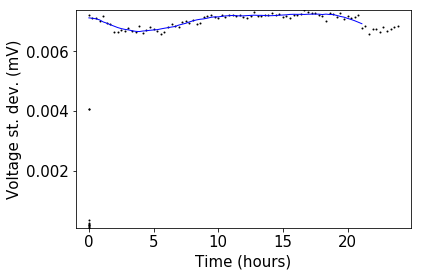

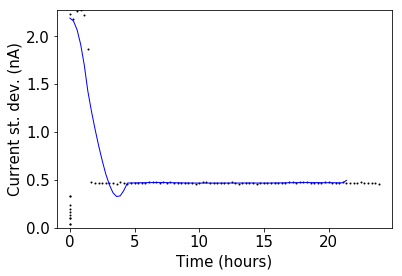

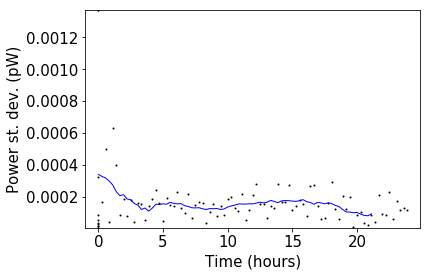

In [76]:
# ORGANIZE AND PLOT STANDARD DEVIATION VS. TIME DATA FROM NOISE FILE
sdtime = np.array(sddata['time'])/3600
sdv = np.array(sddata['/'])*1e3 #voltage in mVolts
sdi = np.array(sddata['s'])*1e9 #current in nanoAmps
sdp = np.array(sddata['volt.noise/V'])*1e12 #power in pWatts

sdvars = [sdv, sdi, sdp] #list for sd plotting
sdlabels = ['Voltage st. dev. (mV)', 'Current st. dev. (nA)', 'Power st. dev. (pW)'] #list for y labels of plots
for i in range(len(sdvars)):
    #filter data for smoothing
    sdfilt = savgol_filter(sdvars[i], 21, 2, mode='mirror') #points, polynomial order, bound. cond.
    plt.plot(sdtime, sdfilt, color='b', linewidth=1) #plot filtered data
    plt.scatter(sdtime, sdvars[i], s=1, color='k') #plot raw sd data
    plt.xlabel('Time (hours)', fontsize=15); plt.ylabel(sdlabels[i], fontsize=15)
    plt.axis((min(sdtime)-1, max(sdtime)+1, min(sdvars[i]), max(sdvars[i])))
    plt.show()

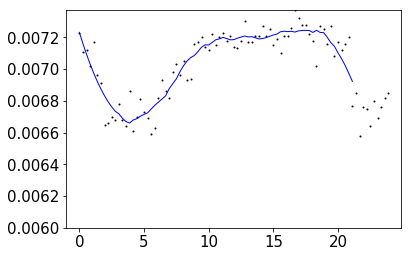

In [91]:
sdfilt = savgol_filter(sdvars[0], 21, 2, mode='interp')
plt.plot(sdtime, sdfilt, color='b', linewidth=1) #plot filtered data
plt.scatter(sdtime, sdvars[0], s=1, color='k') #plot raw sd data
plt.axis((min(sdtime)-1, max(sdtime)+1, .006, max(sdvars[0])))
plt.show()

In [77]:
# EXTRACT FREQUENCY DATA FROM NOISE FILE #############################################################
fline1 = sdline2 + 5 #lines to start and stop import of frequency data

#####################################################################################################
fdata0 = pd.read_table(noisefile, skiprows=fline1, header=0, error_bad_lines=False, sep='\s+') #read in file
fdata = fdata0.apply(pd.to_numeric, errors='coerce').dropna() #change from string to float, coercing to NaN 
print(fdata)

b'Skipping line 5672: expected 4 fields, saw 7\n'
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      Frequency/Hz  volt.noise/V  curr.noise/A   pow.noise/W
0           0.0000  4.060000e-06  3.360000e-10  1.370000e-15
1           0.0005  4.060000e-06  3.360000e-10  1.370000e-15
2           0.0010  3.570000e-07  2.370000e-10  8.460000e-17
3           0.0015  2.600000e-07  1.930000e-10  5.020000e-17
4           0.0020  1.940000e-07  1.700000e-10  3.310000e-17
5           0.0025  1.750000e-07  1.000000e-10  1.750000e-17
6           0.0030  2.150000e-07  1.330000e-10  2.860000e-17
7           0.0035  1.560000e-07  9.800000e-11  1.530000e-17
8           0.0040  1.380000e-07  3.970000e-11  5.490000e-18
9           0.0045  9.650000e-08  3.960000e-11  3.820000e-18
10          0.0050  8.510000e-08  3.890000e-11  3.310000e-18
11          0.0055  2.000000e-08  9.170000e-11  1.830000e-18
12          0.0060  3.600000e-07  1.340000e-10  4.800000e-17
13          0.0065  1.400000e-07  5.380000e-11  7.500000e-18
14          0.0070  8.950000e-08  9.490000e-11  8.490000e-18
15          0.0075  1.24

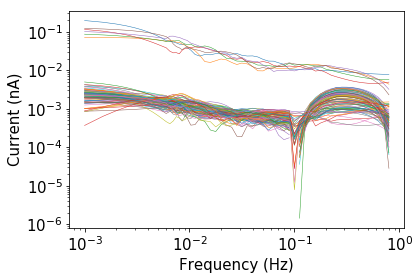

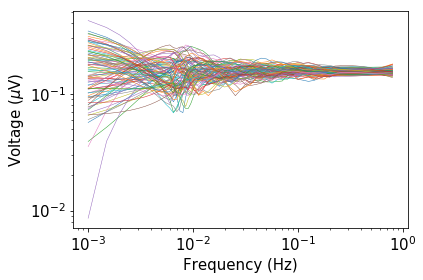

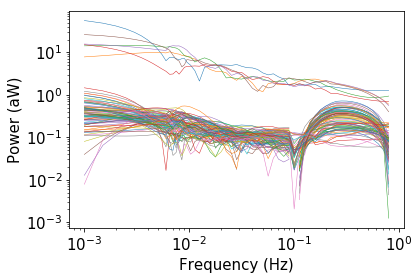

In [78]:
# PLOT FREQUENCY DOMAIN DATA
allf = np.array(fdata['Frequency/Hz']) #frequency in Hz
allv = np.array(fdata['volt.noise/V'])*1e6 #voltage in microVolts
alli = np.array(fdata['curr.noise/A'])*1e9 #current in nanoAmps
allp = np.array(fdata['pow.noise/W'])*1e18 #power in attoWatts

fsweep = []; i=0
while allf[i+1] > allf[i]: fsweep.append(allf[i]); i=i+1 #find length of each freq sweep

fmat0 = np.reshape(allf, (-1,len(fsweep)+1)); imat0 = np.reshape(alli, (-1,len(fsweep)+1)) #reshape into matrices
vmat0 = np.reshape(allv, (-1,len(fsweep)+1)); pmat0 = np.reshape(allp, (-1,len(fsweep)+1))

#set starting/ending indices to remove errant points from freq. measurements############################
si, ei = 2, 2
########################################################################################################
#new empty matrices without first/last couple points
fmat = np.ones((np.shape(fmat0)[0],np.shape(fmat0)[1]-si-ei));
vmat=np.copy(fmat); imat=np.copy(fmat); pmat=np.copy(fmat); zmat=np.copy(fmat)

for i in range(len(fmat)): #create matrices without the first/last couple points
    fmat[i] = fmat0[i][si:-ei]; vmat[i] = vmat0[i][si:-ei]
    imat[i] = imat0[i][si:-ei]; pmat[i] = pmat0[i][si:-ei]
    
fvars = [imat, vmat, pmat] #make lists for looping over plots
flabels = ['Current (nA)', 'Voltage ($\mu$V)', 'Power (aW)']

for j in range(len(flabels)): #plot filtered freq-dependent noise spectra
    for i in range(len(fmat)): 
        ffilt = savgol_filter(fvars[j][i], 21, 2, mode='interp') #points, polynomial order, bound. cond.
        plt.loglog(fmat[i],ffilt, linewidth=.5) #plot noise
    plt.xlabel('Frequency (Hz)',fontsize=15); plt.ylabel(flabels[j],fontsize=15)
    plt.show()

# FIT FREQUENCY DOMAIN DATA fit noise to pink (1/f) or brown (1/f^2)
timecycle = np.arange(len(fmat))*1000/60/60 #create time array

def noisefit(f, c, n):  # define variables in each function
    return c / f**n

for k in range(len(fvars)): #loop over varibles (current, power, impedance)
    clist = []; nlist = [] #save lists of fitting parameters
    for i in range(len(fmat)): #loop over number of timing cycles
        try:
            popt, pcov = curve_fit(noisefit, fmat[i], ffilt)# fvars[k][i]) #find fit parameters
            fit =  noisefit(fmat[i], *popt) #build fit line
            c = popt[0]; n = popt[1] #get fitting parameters from popt
            clist.append(c); nlist.append(n)
        
            plt.semilogy(fmat[i],fvars[k][i]) #plot fits
            plt.plot(fmat[i],fit,linewidth=1, c='k')
        
        except RuntimeError: #if error in fitting, keep going amnd assign 0 values
            clist.append(0); nlist.append(0)
            print('error in fitting column index ' + format(i))

    plt.xlabel('Frequency (Hz)',fontsize=15); plt.ylabel(flabels[k],fontsize=15);
    plt.show()

    plt.plot(timecycle,clist)
    plt.xlabel('Time',fontsize=15); plt.ylabel('c : ' + flabels[k],fontsize=15); plt.show()

    plt.plot(timecycle,nlist)
    plt.xlabel('Time',fontsize=15); plt.ylabel('n : ' + flabels[k],fontsize=15); plt.show()


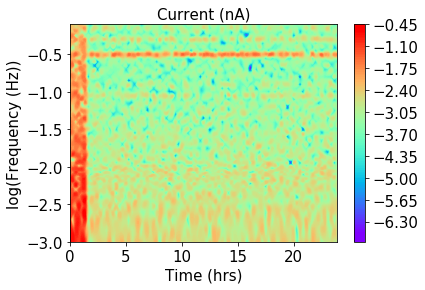

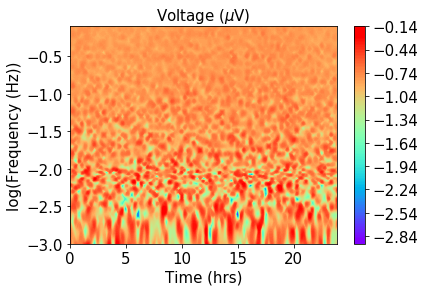

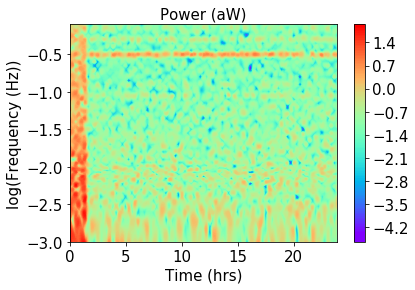

In [79]:
# PLOT IN FREQUENCY DOMAIN OVER TIME
tmatflat = np.array([]) #make flat array of repeating "times"
for i in range(len(fmat)): tmatflat = np.append(tmatflat, np.ones(len(fmat[0]))*i*1000/60/60)

fmatflat = fmat.flatten(); imatflat = imat.flatten()
vmatflat = vmat.flatten(); pmatflat = pmat.flatten()

Zlist = [imatflat, vmatflat, pmatflat] #list of Z values in heatmaps
heatmaplabels = ['Current (nA)', 'Voltage ($\mu$V)', 'Power (aW)']


for i in range(len(Zlist)):  # plot heatmaps of time/frequency-dependent noise
    # set X, Y, and Z for plot
    X, Y, Z, = tmatflat, np.log10(fmatflat), np.log10(Zlist[i]) #time, frequency, noise

    # create x-y points to be used in heatmap
    xi = np.linspace(X.min(),X.max(),1000)
    yi = np.linspace(Y.min(),Y.max(),1000)
    # Z is a matrix of x-y values
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

    # Create the contour plot
    CS = plt.contourf(xi, yi, zi, 150, cmap=plt.cm.rainbow, vmax=np.nanmax(Z), vmin=np.nanmin(Z))
    plt.colorbar(); plt.xlabel('Time (hrs)',fontsize=15); plt.ylabel('log(Frequency (Hz))',fontsize=15);
    plt.title(heatmaplabels[i],fontsize=15); plt.show()

In [80]:
# EXTRACT TIME-DOMAIN DATA ##########################################################################################
tskip = 5672
tdata = pd.read_csv(noisefile, skiprows=tskip, header=0, error_bad_lines=False, sep='\s+') #read in file
####################################################################################################################
tfloatdata = tdata.apply(pd.to_numeric, errors='coerce') #change from string to float, coercing to NaN 
print(tfloatdata)

        volt.noise/V  curr.noise/A
0          -0.000005  6.525000e-10
1           0.000010  5.460000e-10
2          -0.000005 -6.140000e-10
3          -0.000005  6.067000e-10
4          -0.000005  2.253000e-10
5          -0.000005 -1.178000e-09
6           0.000010  1.187000e-09
7           0.000010  1.110000e-09
8           0.000010  5.153000e-10
9           0.000010  1.767000e-09
10         -0.000005  2.377000e-09
11         -0.000005  2.911000e-09
12         -0.000005 -2.338000e-09
13         -0.000005 -1.682000e-09
14         -0.000005  2.285000e-09
15          0.000010  3.872000e-09
16         -0.000005 -8.426000e-10
17         -0.000005 -2.353000e-09
18         -0.000005 -2.384000e-09
19          0.000010 -2.933000e-10
20         -0.000005 -1.255000e-09
21         -0.000005 -2.476000e-10
22          0.000010  2.774000e-09
23          0.000010  1.995000e-09
24         -0.000005  2.255000e-09
25         -0.000005 -9.954000e-10
26         -0.000005  2.102000e-09
27         -0.000005

C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


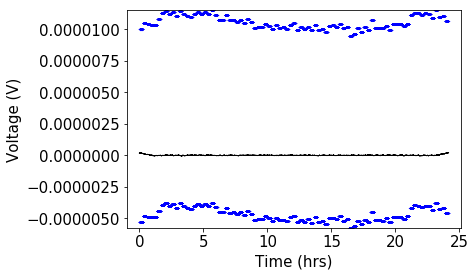

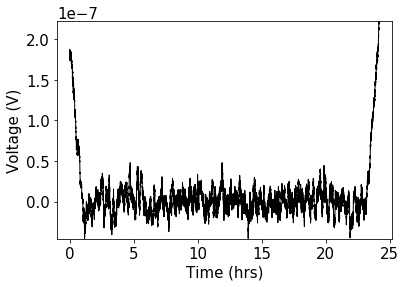

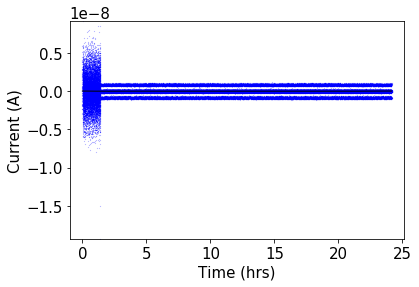

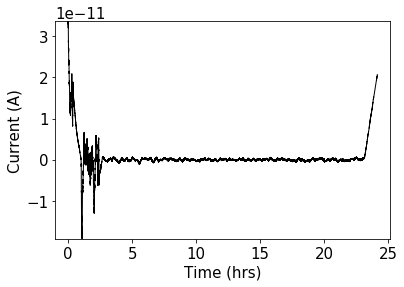

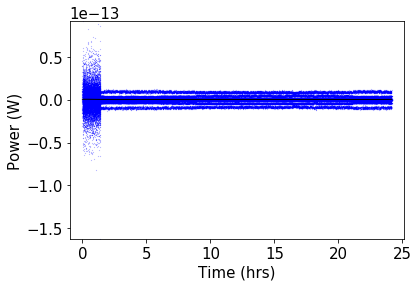

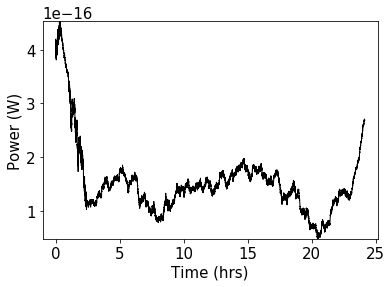

In [83]:
#ORGANIZE AND FILTER/SMOOTH TIME-DOMAIN DATA
from scipy import signal

vt = np.array(tfloatdata['volt.noise/V']) #create voltage nad current arrays for time-domain data 
it = np.array(tfloatdata['curr.noise/A'])
pt = np.multiply(vt,it) #calculate power noise

tlong = (np.arange(len(vt))*0.488)/60/60 #create time array in hours

filtwindow = 15001 # number of points to use for filtering

cval_filling = [vt, it, pt]; padpoints = 1000 # number of points to use for pad average
cval = [] #create constant values to pad sides of savgol filter
for i in range(len(cval_filling)): #average first and last 100 point values to be filter constants for padding
    cval.append(np.mean((cval_filling[i][si:si+padpoints]) +
                        np.mean(cval_filling[i][-ei-padpoints:-ei]))/2)
filtmode = 'constant'
    
#smooth data: values, # of points, polynomial order, bound. cond.
vtfilt = savgol_filter(vt, filtwindow, 1, mode=filtmode, cval=cval[0])
itfilt = savgol_filter(it, filtwindow, 1, mode=filtmode, cval=cval[1])
ptfilt = savgol_filter(pt, filtwindow, 1, mode=filtmode, cval=cval[2])

tvars = [vt, it, pt, np.divide(vt,it)] #create lists for looping
tfiltvars = [vtfilt, itfilt, ptfilt]
tlabels = ['Voltage (V)', 'Current (A)', 'Power (W)']

for i in range(len(tfiltvars)): #plot noise with smoothed curves
    plt.plot(tlong, tfiltvars[i],linewidth=1, c='k') #plot filtered/smoothed data
    plt.scatter(tlong, tvars[i], s=.01, c='b') #plot raw data
    plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel(tlabels[i], fontsize=15)
    plt.axis((min(tlong)-1,max(tlong)+1,min(tvars[i]), max(tvars[i])))
    plt.show()
    
    plt.plot(tlong, tfiltvars[i],linewidth=1, c='k') #plot ONLY filtered/smoothed data
    plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel(tlabels[i], fontsize=15)
    plt.axis((min(tlong)-1,max(tlong)+1,min(tfiltvars[i]), max(tfiltvars[i])))
    plt.show()

In [84]:
len(vtfilt)

178176

In [50]:
# IMPORT PRESSURE DATA
pressurefile = 'C:\\Users\\a6q\\Desktop\\CorrEL noise measurements\\2017-07-19 s-swcnt 7c noise under h2o'
pressuredata = pd.read_csv(pressurefile, delimiter = '\t')# skiprows=fline1, header=0, error_bad_lines=False, sep='\s+') #read in file
#fdata = fdata0.apply(pd.to_numeric, errors='coerce').dropna() #change from string to float, coercing to NaN 
print(pressuredata)

                   date_time  elapsed_time_min  J-KEM_temp_C  \
0     2017-07-19 12:30:14.20          0.377088          27.5   
1     2017-07-19 12:30:31.40          0.663738          27.5   
2     2017-07-19 12:30:48.60          0.950354          27.6   
3     2017-07-19 12:31:05.80          1.237071          27.5   
4     2017-07-19 12:31:23.00          1.523787          27.5   
5     2017-07-19 12:31:40.20          1.810470          27.4   
6     2017-07-19 12:31:57.41          2.097153          27.5   
7     2017-07-19 12:32:14.61          2.383836          27.5   
8     2017-07-19 12:32:31.81          2.670519          27.5   
9     2017-07-19 12:32:49.01          2.957269          27.5   
10    2017-07-19 12:33:06.22          3.243986          27.5   
11    2017-07-19 12:33:23.42          3.530702          27.5   
12    2017-07-19 12:33:40.62          3.817385          27.5   
13    2017-07-19 12:33:57.82          4.104101          27.5   
14    2017-07-19 12:34:15.02          4.

min/max noise times = 0.0 - 24.15261111111111
min/max pressure times = 0.0 - 27.50213186271667
min/max compressed noise times = 0.002101111111111111 - 24.15051
# of noise time points = 178176
# of pressure time points = 5746; # of compressed noise points = 5746


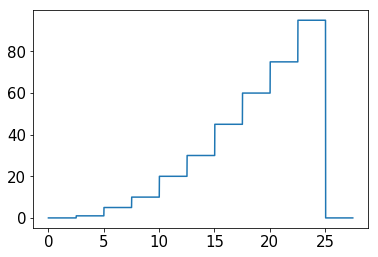

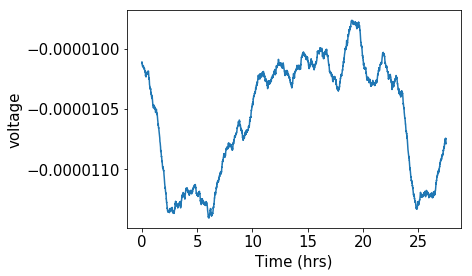

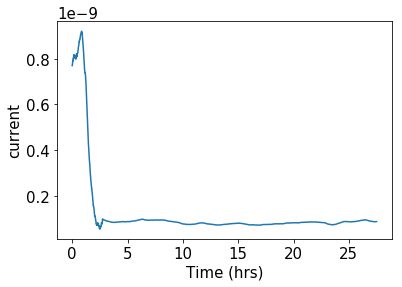

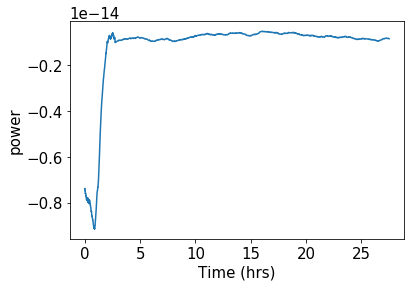

In [55]:
#  MATCH UP NOISE DATA WITH PRESSURE DATA
from scipy import stats

ptime = np.array(pressuredata['elapsed_time_min'] - min(pressuredata['elapsed_time_min']))/60 #pressure times
rh = np.array(pressuredata['pressure_setpoint_Torr']) #pressures (or RH)

#compress each variable to length of pressure data by taking statistics of bins
tmatch = stats.binned_statistic(tlong, tlong, statistic='median', bins=len(ptime))[0] 
vmatch = stats.binned_statistic(tlong, vtfilt, statistic='median', bins=len(ptime))[0]
imatch = stats.binned_statistic(tlong, itfilt, statistic='median', bins=len(ptime))[0]
pmatch = stats.binned_statistic(tlong, ptfilt, statistic='median', bins=len(ptime))[0]

print('min/max noise times = ' + format(min(tlong)) + ' - ' + format(max(tlong)))
print('min/max pressure times = ' + format(min(ptime)) + ' - ' + format(max(ptime)))
print('min/max compressed noise times = ' + format(min(tmatch)) + ' - ' + format(max(tmatch)))
print('# of noise time points = ' + format(len(tlong)))
print('# of pressure time points = ' + format(len(ptime)) + '; # of compressed noise points = ' + format(len(tmatch)))

plt.plot(ptime,rh); plt.show() #plot pressure / RH

plt.plot(ptime,vmatch); plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('voltage', fontsize=15); plt.show()
plt.plot(ptime,imatch); plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('current', fontsize=15); plt.show()
plt.plot(ptime,pmatch); plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('power', fontsize=15); plt.show()

training time (min):40.527, testing MSE (%): 141.073
average absolute error (%)= 4.705


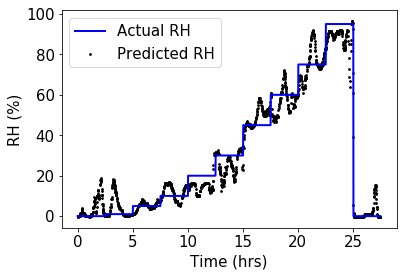

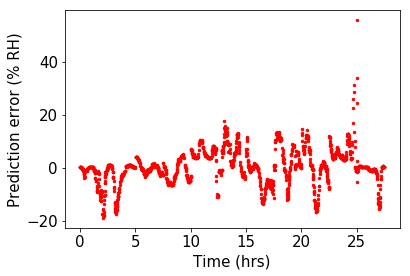

In [36]:
# USE NEURAL NET REGRESSOR TO PREDICT PRESSURE USING NOISE DATA
from theano.tensor.signal.pool import pool_2d
from sknn.mlp import Regressor, Layer
from sklearn.preprocessing import StandardScaler 
from scipy import stats; from sklearn import preprocessing
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import train_test_split
from timeit import default_timer as timer

def MSE(y,y0): #create mean-square error function to calculate ANN performance
    if len(y.shape) > 1:
        y = np.squeeze(y)
    if len(y0.shape) > 1:
        y0 = np.squeeze(y0)
    return (np.average((y - y0)**2))/np.average(y)*100

NNstarttime = timer() #start timer to monitor training time
nn = Regressor(layers=[
        Layer('Sigmoid', units=14), # design network with hidden layers
        Layer('Sigmoid', units=5),
        Layer('Sigmoid', units=2),
        Layer('Linear')], #output layer
    learning_rate=0.02, n_iter=1000)

############## standardize data by subtracting mean and dividing by st. dev. ######################
vmatch_st = np.divide(np.subtract(vmatch,np.mean(vmatch)),np.std(vmatch))
imatch_st = np.divide(np.subtract(imatch,np.mean(imatch)),np.std(imatch))
pmatch_st = np.divide(np.subtract(pmatch,np.mean(pmatch)),np.std(pmatch))
rh_st = np.divide(np.subtract(rh,np.mean(rh)),np.std(rh))

inputlist = (vmatch_st, imatch_st)# insert data to be used as columns for input matrix
targetlist = (rh_st) #insert data to be used as columns for target matrix

#create input matrix
inputmatrix = np.array(inputlist).T if len(np.shape(inputlist)) > 1 else np.array(inputlist) 
#create target matrix    
targetmatrix = np.array(targetlist).T if len(np.shape(targetlist)) > 1 else np.array(targetlist)
targetmatrix = targetmatrix.reshape(-1,1)
indices = np.arange(inputmatrix.shape[0]) #create index list for inputs

#split into random train and test sets while keeping track of the indices used for each
inp_train, inp_test, tar_train, tar_test, inp_indices, tar_indices = train_test_split(
    inputmatrix, targetmatrix, indices, train_size=0.7)

nn.fit(inp_train, tar_train) #train network
prediction_raw = nn.predict(inp_test) #make predictions (still standardized)

prediction = np.add(np.multiply(np.std(rh),prediction_raw),np.mean(rh)) # UNSTANDARDIZE DATA
tar_test0 = np.add(np.multiply(np.std(rh),tar_test),np.mean(rh))
errors = np.subtract(tar_test0, prediction) #calculate prediction errors
tar_times = ptime[tar_indices] #make array of times that correspond to testing points

NNendtime = timer(); NNtime = (NNendtime - NNstarttime) / 60 #total training time in minutes
print('training time (min):' + format(round(NNtime,3)) + ', testing MSE (%): '
      + format(round(MSE(tar_test0, prediction),3)))
print('average absolute error (%)= '+ format(round(np.mean(np.abs(errors)),3)))
#print(nn.get_parameters()) #summarize network parameters

plt.plot(ptime, rh, c='b', linewidth=2, label='Actual RH') #plot pressure / RH
plt.scatter(tar_times, prediction, c='k', s=3, label='Predicted RH') #plot predictions
plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('RH (%)', fontsize=15)
plt.legend(loc='upper left', fontsize=15); plt.show()

plt.scatter(tar_times, errors, c='r', s=6) #plot errors
plt.xlabel('Time (hrs)', fontsize=15); plt.ylabel('Prediction error (% RH)', fontsize=15)
plt.show()

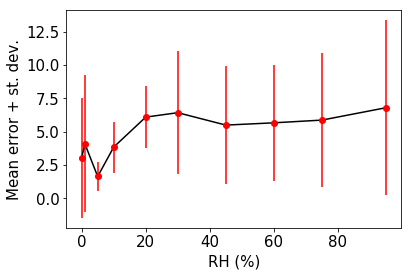

avg errors = [ 3.04  4.09  1.64  3.84  6.09  6.42  5.49  5.66  5.87  6.79]


In [46]:
tar_test0 = tar_test0.flatten(); errors = errors.flatten()
rhvalues = np.unique(tar_test0)

errormean, errorstd = [], []
for i in rhvalues: #look through each individual RH value
    error00 = np.array([])
    for j in range(len(errors)): #collect errors at each RH to average them as a function of RH
        if i == tar_test0[j]: error00 = np.append(error00, errors[j]) 
    errormean.append(np.mean(np.abs(error00)))
    errorstd.append(np.std(np.abs((error00))))

plt.errorbar(rhvalues, errormean, yerr=errorstd, fmt='o', c='r')
plt.plot(rhvalues, errormean, c='k')
plt.xlabel('RH (%)', fontsize=15); plt.ylabel('Mean error + st. dev.', fontsize=15)
plt.show()

print('avg errors = '+ format(np.around(errormean, decimals=2)))

In [53]:
%store -r errormean
print(errormean)

[3.0354552132998078, 4.0916543547053621, 1.6379012490912903, 3.8414621751091924, 6.0886890325915921, 6.4201129256058174, 5.4901338389689451, 5.6608286296574848, 5.8652964490457666, 6.7932434088292375]


In [59]:
cval = np.ones(3)
cval

array([ 1.,  1.,  1.])

# SAVE NN RESULTS TO CSV FILE

NNfile = "NNresults.csv"
saveNNdata = []; NNheaders = []; savetar = []

#see if input/target lists are multi-dimensional and reshape if necessary
#save test inputs:
if len(np.shape(inputlist)) > 1:
    for i in range(len(inputlist)):
        saveNNdata.append(zip(*inp_test)[i])
        NNheaders.append('test_input' + str(i+1))
else:
    saveNNdata.append(np.reshape(inp_test,len(inp_test)))
    NNheaders.append('test_input')
    
#save test targets and predictions:
if len(np.shape(targetlist)) > 1:
    for i in range(len(targetlist)):
        saveNNdata.append(zip(*tar_test)[i]) 
        NNheaders.append('test_target' + str(i+1))
        saveNNdata.append(zip(*prediction)[i])
        NNheaders.append('prediction' + str(i+1))
else:
    saveNNdata.append(np.reshape(tar_test,len(tar_test)))
    NNheaders.append('test_target')
    saveNNdata.append(np.reshape(prediction, len(tar_test)))
    NNheaders.append('prediction')
                        
saveNNdata = zip(*saveNNdata)
#open CSV file
with open(NNfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(NNheaders) #write headers
    for row in saveNNdata:
        writer.writerow(row)

#grid search optimizes network among the choices you give it:
'''
gs = GridSearchCV(nn, param_grid={
    'learning_rate': [0.05, 0.01, 0.005, 0.001],
    'hidden0__units': [4,8,12]
    'hidden0__type': ['Rectifier', 'Sigmoid', 'Tanh']})
gs.fit(X,y)
'''
# or among random parameters:
'''
gs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform[0.001, 0.1],
    'hidden0__units': stats.radint[3,15],
    'hidden0__type': ['Rectifier', 'Sigmoid', 'Tanh']})
gs.fit(X,y)
'''
#to save trained network:
#pickle.dump(nn, open('nn.pk1', 'wb'))

#to load trained network:
# nn = pickel.load(open('nn.pk1', 'rb'))

